In [1]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Users\junaid\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
dataframe = pandas.read_csv("sonar.csv", header=None)

from sklearn.utils import shuffle
dataframe = shuffle(dataframe)

dataset = dataframe.values

X = dataset[:, 0:60].astype(float)
Y = dataset[:, 60]

X[0].shape

(60,)

In [4]:
# baseline model
def create_baseline():
    # create model, write code below
    model = Sequential()
    model.add(Dense(60, activation='relu', input_shape=(60,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model, write code below
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    return model

In [5]:
le = LabelEncoder()
encoded_Y = le.fit(Y).transform(Y)
encoded_Y

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [6]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 82.18% (3.75%)


In [15]:
# evaluate baseline model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
 - 1s - loss: 0.6285 - acc: 0.6398
Epoch 2/100
 - 0s - loss: 0.4190 - acc: 0.8333
Epoch 3/100
 - 0s - loss: 0.3191 - acc: 0.8710
Epoch 4/100
 - 0s - loss: 0.2529 - acc: 0.9140
Epoch 5/100
 - 0s - loss: 0.2028 - acc: 0.9355
Epoch 6/100
 - 0s - loss: 0.1569 - acc: 0.9731
Epoch 7/100
 - 0s - loss: 0.1159 - acc: 0.9946
Epoch 8/100
 - 0s - loss: 0.0902 - acc: 0.9946
Epoch 9/100
 - 0s - loss: 0.0706 - acc: 1.0000
Epoch 10/100
 - 0s - loss: 0.0518 - acc: 0.9946
Epoch 11/100
 - 0s - loss: 0.0405 - acc: 1.0000
Epoch 12/100
 - 0s - loss: 0.0289 - acc: 1.0000
Epoch 13/100
 - 0s - loss: 0.0219 - acc: 1.0000
Epoch 14/100
 - 0s - loss: 0.0176 - acc: 1.0000
Epoch 15/100
 - 0s - loss: 0.0141 - acc: 1.0000
Epoch 16/100
 - 0s - loss: 0.0115 - acc: 1.0000
Epoch 17/100
 - 0s - loss: 0.0097 - acc: 1.0000
Epoch 18/100
 - 0s - loss: 0.0082 - acc: 1.0000
Epoch 19/100
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 21/100
 - 0s - loss: 0.0052 - acc: 1.0000
E

Epoch 65/100
 - 0s - loss: 2.4807e-04 - acc: 1.0000
Epoch 66/100
 - 0s - loss: 2.3868e-04 - acc: 1.0000
Epoch 67/100
 - 0s - loss: 2.2909e-04 - acc: 1.0000
Epoch 68/100
 - 0s - loss: 2.1911e-04 - acc: 1.0000
Epoch 69/100
 - 0s - loss: 2.1097e-04 - acc: 1.0000
Epoch 70/100
 - 0s - loss: 2.0288e-04 - acc: 1.0000
Epoch 71/100
 - 0s - loss: 1.9597e-04 - acc: 1.0000
Epoch 72/100
 - 0s - loss: 1.8808e-04 - acc: 1.0000
Epoch 73/100
 - 0s - loss: 1.8160e-04 - acc: 1.0000
Epoch 74/100
 - 0s - loss: 1.7507e-04 - acc: 1.0000
Epoch 75/100
 - 0s - loss: 1.6745e-04 - acc: 1.0000
Epoch 76/100
 - 0s - loss: 1.6201e-04 - acc: 1.0000
Epoch 77/100
 - 0s - loss: 1.5723e-04 - acc: 1.0000
Epoch 78/100
 - 0s - loss: 1.5019e-04 - acc: 1.0000
Epoch 79/100
 - 0s - loss: 1.4600e-04 - acc: 1.0000
Epoch 80/100
 - 0s - loss: 1.4042e-04 - acc: 1.0000
Epoch 81/100
 - 0s - loss: 1.3598e-04 - acc: 1.0000
Epoch 82/100
 - 0s - loss: 1.3154e-04 - acc: 1.0000
Epoch 83/100
 - 0s - loss: 1.2639e-04 - acc: 1.0000
Epoch 84/100

Epoch 28/100
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 29/100
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 30/100
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 31/100
 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 32/100
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 33/100
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 34/100
 - 0s - loss: 0.0010 - acc: 1.0000
Epoch 35/100
 - 0s - loss: 9.5972e-04 - acc: 1.0000
Epoch 36/100
 - 0s - loss: 8.8410e-04 - acc: 1.0000
Epoch 37/100
 - 0s - loss: 8.2376e-04 - acc: 1.0000
Epoch 38/100
 - 0s - loss: 7.7030e-04 - acc: 1.0000
Epoch 39/100
 - 0s - loss: 7.3150e-04 - acc: 1.0000
Epoch 40/100
 - 0s - loss: 6.7279e-04 - acc: 1.0000
Epoch 41/100
 - 0s - loss: 6.2417e-04 - acc: 1.0000
Epoch 42/100
 - 0s - loss: 5.9281e-04 - acc: 1.0000
Epoch 43/100
 - 0s - loss: 5.5195e-04 - acc: 1.0000
Epoch 44/100
 - 0s - loss: 5.2585e-04 - acc: 1.0000
Epoch 45/100
 - 0s - loss: 4.8846e-04 - acc: 1.0000
Epoch 46/100
 - 0s - loss: 4.6409e-04 - acc: 1.0000
Epoch 47/100
 - 0s - loss: 4.3510e-04 - 

Epoch 89/100
 - 0s - loss: 6.9335e-05 - acc: 1.0000
Epoch 90/100
 - 0s - loss: 6.7051e-05 - acc: 1.0000
Epoch 91/100
 - 0s - loss: 6.4672e-05 - acc: 1.0000
Epoch 92/100
 - 0s - loss: 6.2449e-05 - acc: 1.0000
Epoch 93/100
 - 0s - loss: 6.0360e-05 - acc: 1.0000
Epoch 94/100
 - 0s - loss: 5.8409e-05 - acc: 1.0000
Epoch 95/100
 - 0s - loss: 5.6494e-05 - acc: 1.0000
Epoch 96/100
 - 0s - loss: 5.4993e-05 - acc: 1.0000
Epoch 97/100
 - 0s - loss: 5.3038e-05 - acc: 1.0000
Epoch 98/100
 - 0s - loss: 5.1307e-05 - acc: 1.0000
Epoch 99/100
 - 0s - loss: 4.9811e-05 - acc: 1.0000
Epoch 100/100
 - 0s - loss: 4.8097e-05 - acc: 1.0000
Epoch 1/100
 - 1s - loss: 0.6325 - acc: 0.6738
Epoch 2/100
 - 0s - loss: 0.4060 - acc: 0.8770
Epoch 3/100
 - 0s - loss: 0.3051 - acc: 0.9037
Epoch 4/100
 - 0s - loss: 0.2363 - acc: 0.9251
Epoch 5/100
 - 0s - loss: 0.1831 - acc: 0.9572
Epoch 6/100
 - 0s - loss: 0.1450 - acc: 0.9840
Epoch 7/100
 - 0s - loss: 0.1096 - acc: 0.9893
Epoch 8/100
 - 0s - loss: 0.0849 - acc: 0.9893

Epoch 53/100
 - 0s - loss: 4.1681e-04 - acc: 1.0000
Epoch 54/100
 - 0s - loss: 3.9097e-04 - acc: 1.0000
Epoch 55/100
 - 0s - loss: 3.7363e-04 - acc: 1.0000
Epoch 56/100
 - 0s - loss: 3.5538e-04 - acc: 1.0000
Epoch 57/100
 - 0s - loss: 3.3876e-04 - acc: 1.0000
Epoch 58/100
 - 0s - loss: 3.2260e-04 - acc: 1.0000
Epoch 59/100
 - 0s - loss: 3.0903e-04 - acc: 1.0000
Epoch 60/100
 - 0s - loss: 2.9503e-04 - acc: 1.0000
Epoch 61/100
 - 0s - loss: 2.8031e-04 - acc: 1.0000
Epoch 62/100
 - 0s - loss: 2.6704e-04 - acc: 1.0000
Epoch 63/100
 - 0s - loss: 2.5474e-04 - acc: 1.0000
Epoch 64/100
 - 0s - loss: 2.4528e-04 - acc: 1.0000
Epoch 65/100
 - 0s - loss: 2.3435e-04 - acc: 1.0000
Epoch 66/100
 - 0s - loss: 2.2325e-04 - acc: 1.0000
Epoch 67/100
 - 0s - loss: 2.1420e-04 - acc: 1.0000
Epoch 68/100
 - 0s - loss: 2.0640e-04 - acc: 1.0000
Epoch 69/100
 - 0s - loss: 1.9774e-04 - acc: 1.0000
Epoch 70/100
 - 0s - loss: 1.9006e-04 - acc: 1.0000
Epoch 71/100
 - 0s - loss: 1.8277e-04 - acc: 1.0000
Epoch 72/100

Epoch 15/100
 - 0s - loss: 0.0128 - acc: 1.0000
Epoch 16/100
 - 0s - loss: 0.0107 - acc: 1.0000
Epoch 17/100
 - 0s - loss: 0.0088 - acc: 1.0000
Epoch 18/100
 - 0s - loss: 0.0074 - acc: 1.0000
Epoch 19/100
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 21/100
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 22/100
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 23/100
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 24/100
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 25/100
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 26/100
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 27/100
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 28/100
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 29/100
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 30/100
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 31/100
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 32/100
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 33/100
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 34/100
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 35/100
 - 0s - loss: 0.0012 - acc:

Epoch 78/100
 - 0s - loss: 1.5020e-04 - acc: 1.0000
Epoch 79/100
 - 0s - loss: 1.4390e-04 - acc: 1.0000
Epoch 80/100
 - 0s - loss: 1.3919e-04 - acc: 1.0000
Epoch 81/100
 - 0s - loss: 1.3468e-04 - acc: 1.0000
Epoch 82/100
 - 0s - loss: 1.2939e-04 - acc: 1.0000
Epoch 83/100
 - 0s - loss: 1.2474e-04 - acc: 1.0000
Epoch 84/100
 - 0s - loss: 1.2078e-04 - acc: 1.0000
Epoch 85/100
 - 0s - loss: 1.1683e-04 - acc: 1.0000
Epoch 86/100
 - 0s - loss: 1.1257e-04 - acc: 1.0000
Epoch 87/100
 - 0s - loss: 1.0908e-04 - acc: 1.0000
Epoch 88/100
 - 0s - loss: 1.0518e-04 - acc: 1.0000
Epoch 89/100
 - 0s - loss: 1.0186e-04 - acc: 1.0000
Epoch 90/100
 - 0s - loss: 9.8531e-05 - acc: 1.0000
Epoch 91/100
 - 0s - loss: 9.5630e-05 - acc: 1.0000
Epoch 92/100
 - 0s - loss: 9.2834e-05 - acc: 1.0000
Epoch 93/100
 - 0s - loss: 8.9402e-05 - acc: 1.0000
Epoch 94/100
 - 0s - loss: 8.6588e-05 - acc: 1.0000
Epoch 95/100
 - 0s - loss: 8.3592e-05 - acc: 1.0000
Epoch 96/100
 - 0s - loss: 8.1189e-05 - acc: 1.0000
Epoch 97/100

In [8]:
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(60,)))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

model.fit(X,
          encoded_Y,
          epochs=90,
          batch_size=5)

Epoch 1/90
208/208 [==============================] - 1s 3ms/step - loss: 0.6887 - acc: 0.5337
Epoch 2/90
208/208 [==============================] - 0s 303us/step - loss: 0.6441 - acc: 0.6346
Epoch 3/90
208/208 [==============================] - 0s 284us/step - loss: 0.6085 - acc: 0.7019
Epoch 4/90
208/208 [==============================] - 0s 313us/step - loss: 0.5690 - acc: 0.7260
Epoch 5/90
208/208 [==============================] - 0s 255us/step - loss: 0.5266 - acc: 0.7500
Epoch 6/90
208/208 [==============================] - 0s 327us/step - loss: 0.4997 - acc: 0.7452
Epoch 7/90
208/208 [==============================] - 0s 397us/step - loss: 0.4570 - acc: 0.7885
Epoch 8/90
208/208 [==============================] - 0s 248us/step - loss: 0.4451 - acc: 0.7837
Epoch 9/90
208/208 [==============================] - 0s 342us/step - loss: 0.4335 - acc: 0.7933
Epoch 10/90
208/208 [==============================] - 0s 288us/step - loss: 0.4041 - acc: 0.8221
Epoch 11/90
208/208 [==========

208/208 [==============================] - 0s 351us/step - loss: 0.0077 - acc: 1.0000
Epoch 85/90
208/208 [==============================] - 0s 409us/step - loss: 0.0067 - acc: 1.0000
Epoch 86/90
208/208 [==============================] - 0s 389us/step - loss: 0.0066 - acc: 1.0000
Epoch 87/90
208/208 [==============================] - 0s 394us/step - loss: 0.0059 - acc: 1.0000
Epoch 88/90
208/208 [==============================] - 0s 336us/step - loss: 0.0058 - acc: 1.0000
Epoch 89/90
208/208 [==============================] - 0s 321us/step - loss: 0.0053 - acc: 1.0000
Epoch 90/90
208/208 [==============================] - 0s 332us/step - loss: 0.0053 - acc: 1.0000


In [9]:
x_val = X[:50]
partial_x_train = X[50:]

y_val = encoded_Y[:50]
partial_y_train = encoded_Y[50:]

In [10]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(60,)))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=5,
          validation_data=(x_val, y_val))

Train on 158 samples, validate on 50 samples
Epoch 1/5
158/158 [==============================] - 1s 6ms/step - loss: 0.6892 - acc: 0.5759 - val_loss: 0.6429 - val_acc: 0.7000
Epoch 2/5
158/158 [==============================] - 0s 468us/step - loss: 0.6506 - acc: 0.5759 - val_loss: 0.6200 - val_acc: 0.6800
Epoch 3/5
158/158 [==============================] - 0s 380us/step - loss: 0.6113 - acc: 0.6582 - val_loss: 0.5834 - val_acc: 0.7400
Epoch 4/5
158/158 [==============================] - 0s 430us/step - loss: 0.5903 - acc: 0.6519 - val_loss: 0.5438 - val_acc: 0.7400
Epoch 5/5
158/158 [==============================] - 0s 449us/step - loss: 0.5385 - acc: 0.7722 - val_loss: 0.5153 - val_acc: 0.8200


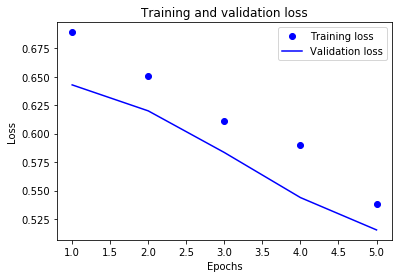

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
k=10
num_val_samples = len(X)//k
num_epochs = 100
all_results = []

for i in range(k):
    print('\n\nprocessing fold #', i+1)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = encoded_Y[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [X[:i * num_val_samples],
         X[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [encoded_Y[:i * num_val_samples],
         encoded_Y[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = create_baseline()
    history = model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=5, verbose=0, validation_data=(val_data, val_targets))
    
    results = model.evaluate(val_data, val_targets, verbose=0)
    all_results.append(results[1])
    
print(np.average(all_results))
    
#     print(results)
    
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
    
#     epochs = range(1, len(loss) + 1)

#     plt.plot(epochs, loss, 'bo', label='Training loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

# np.random.shuffle(dataset)



processing fold # 1


processing fold # 2


processing fold # 3


processing fold # 4


processing fold # 5


processing fold # 6


processing fold # 7


processing fold # 8


processing fold # 9


processing fold # 10
0.8600000023841858


In [13]:
np.average(all_results)

0.8600000023841858